# The purpose of this project is to analyze the dataset about the westbound traffic on the I-94 Interstate Highway.

### The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

### Link to the [Dataset](https://app.dataquest.io/c/95/m/524/guided-project%3A-finding-heavy-traffic-indicators-on-i-94/1/the-i-94-traffic-dataset)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Read the data and show first 5 rows,

In [2]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


Show last 5 rows of data.

In [3]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

<function matplotlib.pyplot.show(*args, **kw)>

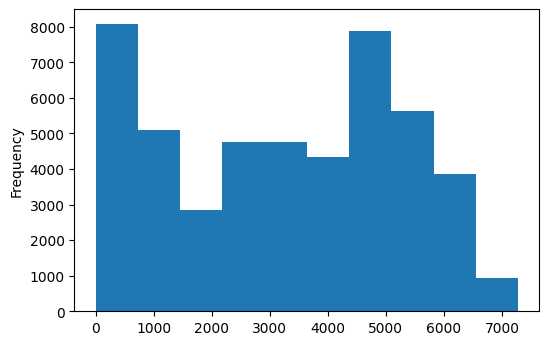

In [5]:
traffic['traffic_volume'].plot.hist()
plt.show

In [6]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

 - About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
 <br>
 <br>
 - About 75% of the time, the traffic volume was four times as much (4,933 cars or more).

In [7]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [8]:
traffic['date_time'].head(10)

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
5   2012-10-02 14:00:00
6   2012-10-02 15:00:00
7   2012-10-02 16:00:00
8   2012-10-02 17:00:00
9   2012-10-02 18:00:00
Name: date_time, dtype: datetime64[ns]

In [9]:
day_traffic = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(day_traffic.shape[0])

night_traffic = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(night_traffic.shape[0])

23877
24327


(-100.0, 7500.0)

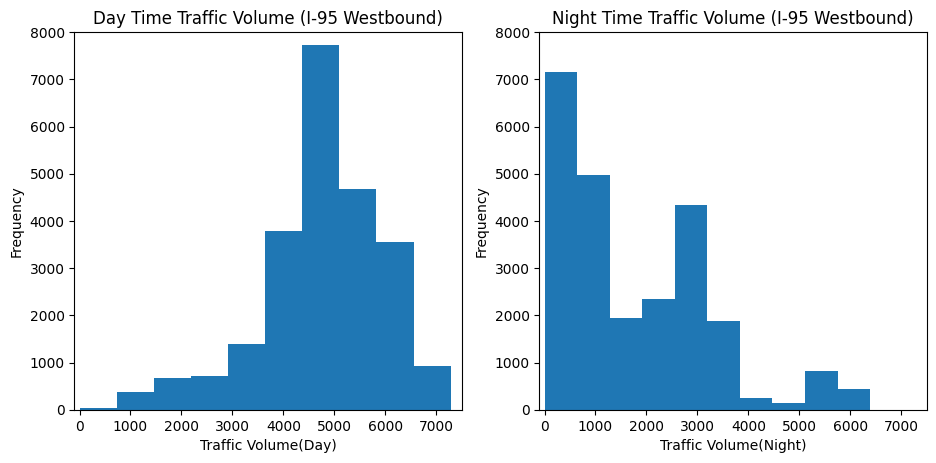

In [10]:
plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
plt.hist(day_traffic['traffic_volume'])
plt.title('Day Time Traffic Volume (I-95 Westbound)')
plt.xlabel('Traffic Volume(Day)')
plt.ylabel('Frequency')
plt.ylim(0,8000)
plt.xlim(-100,7500)

plt.subplot(1,2,2)
plt.hist(night_traffic['traffic_volume'])
plt.title('Night Time Traffic Volume (I-95 Westbound)')
plt.xlabel('Traffic Volume(Night)')
plt.ylabel('Frequency')
plt.ylim(0,8000)
plt.xlim(-100,7500)

In [11]:
day_traffic['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [12]:
night_traffic['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The data here compares the traffic volumes between night(7pm - 7am) and day(7am - 7pm) time. The results shows that traffic is a lot heavier when compared to night time.

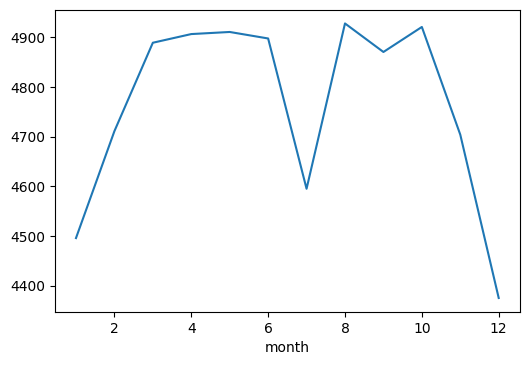

In [13]:
day_traffic['month'] = day_traffic['date_time'].dt.month
by_month = day_traffic.groupby('month').mean()
by_month['traffic_volume'].plot.line()

We generated a line plot showing how the traffic volume changed each month on average.

 - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).

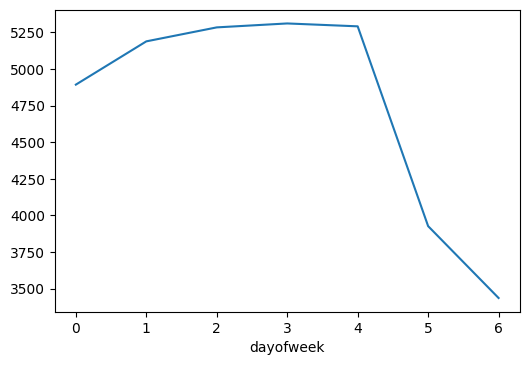

In [14]:
day_traffic['dayofweek'] = day_traffic['date_time'].dt.dayofweek
by_dayofweek = day_traffic.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()

0 is Monday; 6 is Sunday.
<br>
<br>
We found that the traffic volume is significantly heavier on business days compared to the weekends.

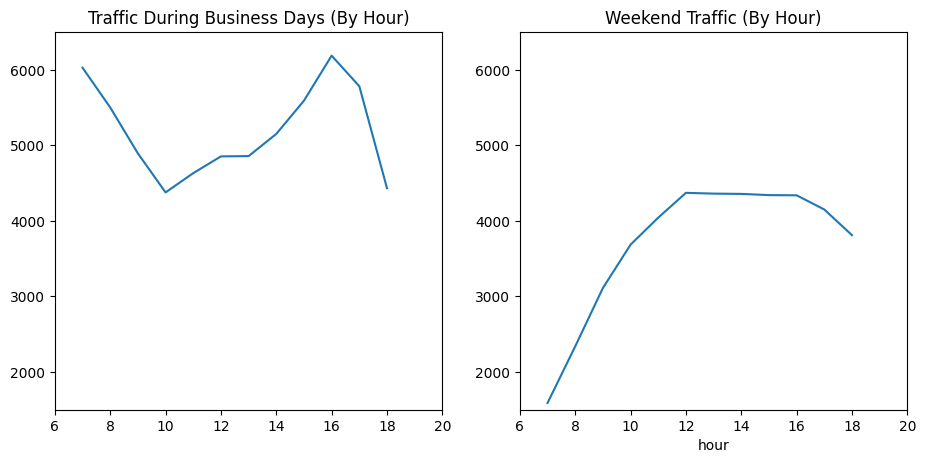

In [15]:
day_traffic['hour'] = day_traffic['date_time'].dt.hour
business_days = day_traffic.copy()[day_traffic['dayofweek'] <= 4] #since 4 is Friday
weekend = day_traffic.copy()[day_traffic['dayofweek'] >= 5] #since 5 is Saturday
by_business_hour = business_days.groupby('hour').mean()
by_weekend_hour = weekend.groupby('hour').mean()

plt.figure(figsize =(11,5))

plt.subplot(1,2,1)
plt.plot(by_business_hour['traffic_volume'])
plt.title('Traffic During Business Days (By Hour)')
plt.ylim(1500,6500)
plt.xlim(6,20)

plt.subplot(1,2,2)
by_weekend_hour['traffic_volume'].plot.line()
plt.title('Weekend Traffic (By Hour)')
plt.xlim(6,20)
plt.ylim(1500,6500)

plt.show()

 - The traffic is usually heavier on business days compared to weekends.
    <br>
    <br>
 - On business days, the rush hours are around 7 and 16.

In [16]:
day_traffic.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

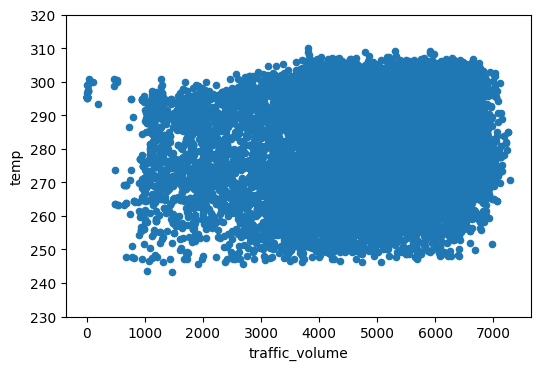

In [17]:
day_traffic.plot.scatter('traffic_volume','temp')
plt.ylim(230,320)
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

we examined the correlation between traffic_volume and the numerical weather columns. However, we didn't find any reliable indicator of heavy traffic.
<br>
To see if we can find more useful data, we'll look next at the categorical weather-related columns: *weather_main* and *weather_description*.

In [18]:
by_weather_main = day_traffic.groupby('weather_main').mean()
by_weather_description = day_traffic.groupby('weather_description').mean()

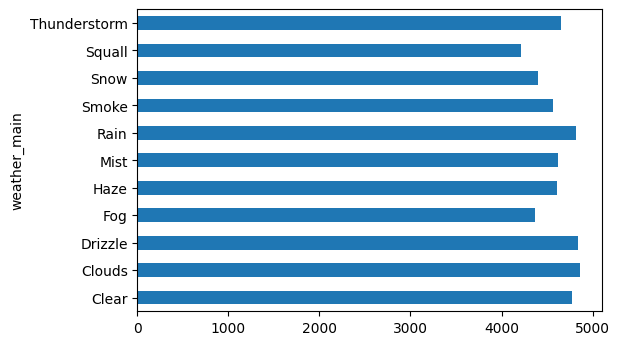

In [19]:
by_weather_main['traffic_volume'].plot.barh()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult

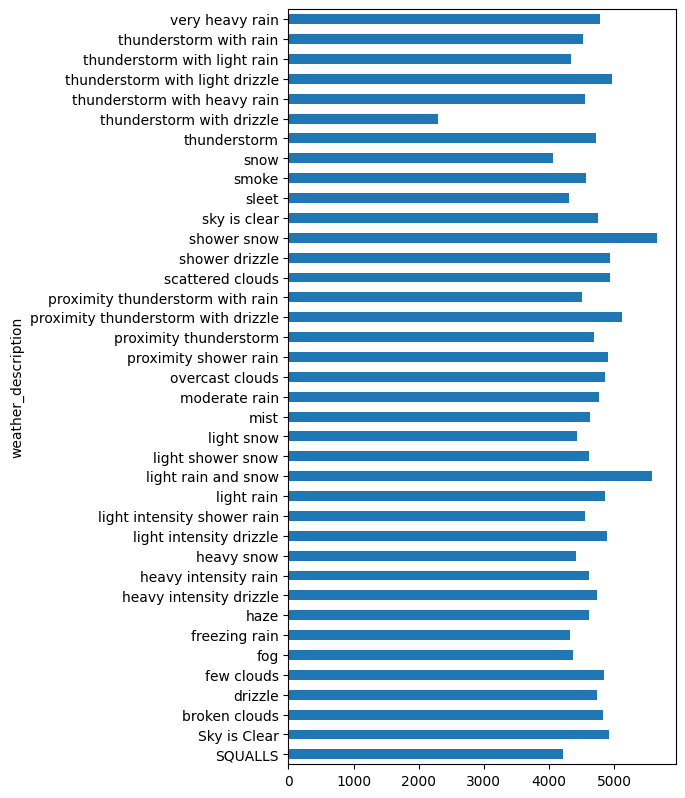

In [21]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))

It looks like there are three weather types where traffic volume exceeds 5,000:

 - Shower snow
 - Light rain and snow
 - Proximity thunderstorm with drizzle

In [22]:
weekend.corr()['traffic_volume']

temp              0.194895
rain_1h          -0.112488
snow_1h          -0.026517
clouds_all       -0.021636
traffic_volume    1.000000
month            -0.010350
dayofweek        -0.222118
hour              0.604632
Name: traffic_volume, dtype: float64

There is no strong correlation here.

In [25]:
weekend_weather = weekend.groupby('weather_main').mean()
weekend_weather_description = weekend.groupby('weather_description').mean()

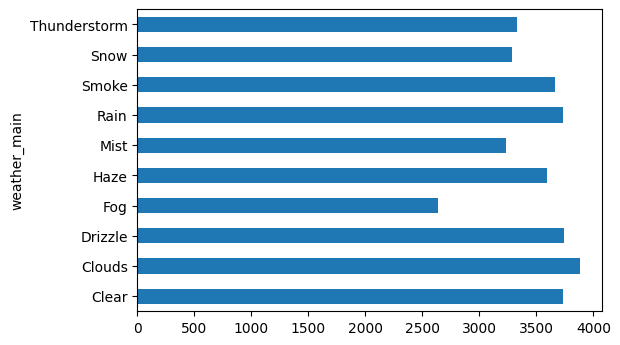

In [27]:
weekend_weather['traffic_volume'].plot.barh()

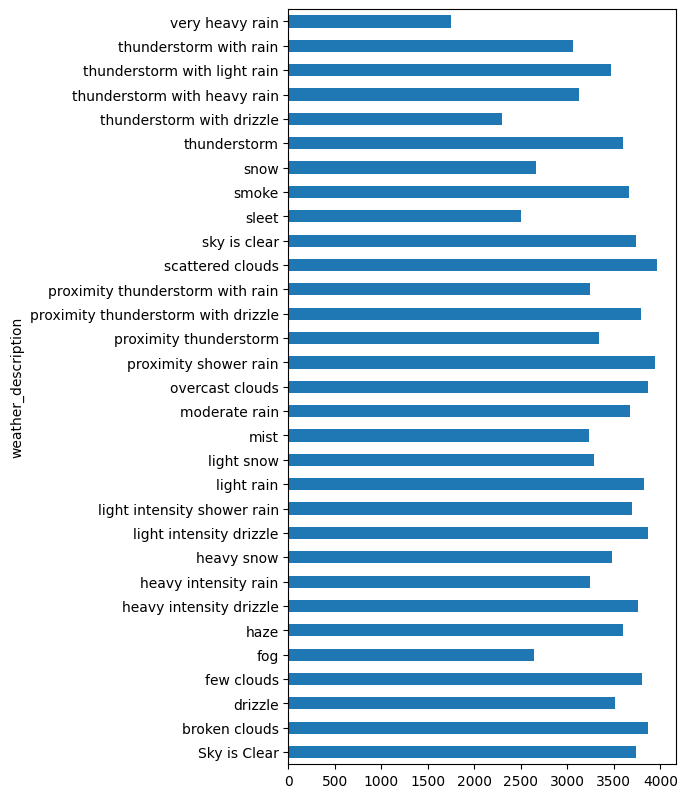

In [28]:
weekend_weather_description['traffic_volume'].plot.barh(figsize=(5,10))